In [1]:
'''The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. 
Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yea. 
However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make a difference in the vote?'''

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [4]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

p-value = 1.0


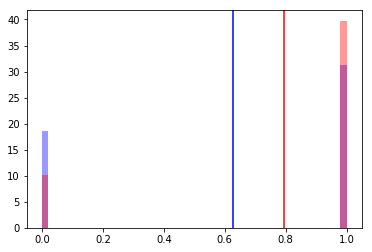

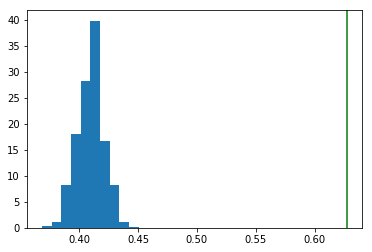

In [5]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / (len(dems) + len(reps))
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= np.sum(dems)/len(dems)) / len(perm_replicates)
print('p-value =', p)
# This shows that party affiliation is a heavy influencer on the democrats voting choices
# Lets some some simple EDA

plt.hist(dems,bins=50,density=True,color='blue',alpha=.4)
plt.hist(reps,bins=50,density=True,color='red',alpha=.4)
plt.axvline(x=np.mean(dems),color='blue')
plt.axvline(x=np.mean(reps),color='red')
plt.show()

# So after permutation we see that the mean of the data is approximately zero versus our recorded data
# of having the mean equal to -344
plt.hist(perm_replicates,density=True)
# This green line symbolizes expected mean
plt.axvline(x=np.sum(dems)/len(dems),color='green')
plt.show()

# The second graph can really visualize how off we are and point out that it is statistically very unlikely that
# the party affliation does not impact voting 

In [6]:
'''In 1920, Major League Baseball implemented important rule changes that ended the so-called dead ball era. 
Importantly, the pitcher was no longer allowed to spit on or scuff the ball, an activity that greatly favors 
pitchers. In this problem you will perform an A/B test to determine if these rule changes resulted in a slower 
rate of no-hitters (i.e., longer average time between no-hitters) using the difference in mean inter-no-hitter 
time as your test statistic. '''


# Data of average time between no-hitters from the dead ball era
nht_dead = np.array([  0,  894,   10,  130,    1,  934,   29,    6,  485,  254,  372,
         81,  191,  355,  180,  286,   47,  269,  361,  173,  246,  492,
        462, 1319,   58,  297,   31, 2970,  640,  237,  434,  570,   77,
        271,  563, 3365,   89,    0,  379,  221,  479,  367,  628,  843,
       1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,  715,
        966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,  104,
       1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,  166,
         96,  702,   23,  524,   26,  299,   59,   39,   12,    2,  308,
       1114,  813,  887])
# Data of average time between no-hitters from the live ball era
nht_live = np.array([ 645, 2088,   42, 2090,   11,  886, 1665, 1084, 2900, 2432,  750,
       4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127,
       2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392,
         73,  603,  233,  255,  528,  397, 1529, 1023, 1194,  462,  583,
         37,  943,  996,  480, 1497,  717,  224,  219, 1531,  498,   44,
        288,  267,  600,   52,  269, 1086,  386,  176, 2199,  216,   54,
        675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197,
        136,   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226,
        605,  539, 1491,  323,  240,  179,  702,  156,   82, 1397,  354,
        778,  603, 1001,  385,  986,  203,  149,  576,  445,  180, 1403,
        252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,  100,
       2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563,
        206,  660,  242,  577,  179,  157,  192,  192, 1848,  792, 1693,
         55,  388,  225, 1134, 1172, 1555,   31, 1582, 1044,  378, 1687,
       2915,  280,  765, 2819,  511, 1521,  745, 2491,  580, 2072, 6450,
        578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351,
        391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814,
        603, 1349,  162, 1027,  783,  326,  101,  876,  381,  905,  156,
        419,  239,  119,  129,  467])

In [7]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

p-val = 0.0


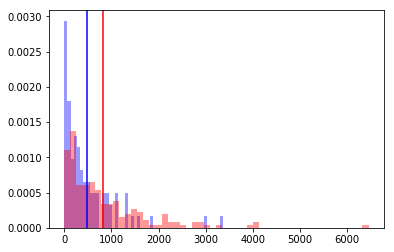

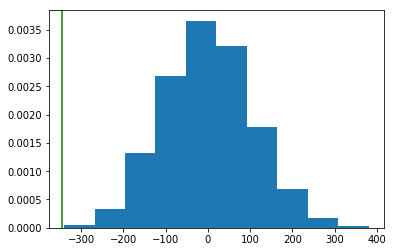

In [8]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead,nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead,nht_live,diff_of_means,10000)


# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs)/ len(perm_replicates)
print('p-val =', p)

plt.hist(nht_dead,bins=50,density=True,color='blue',alpha=.4)
plt.hist(nht_live,bins=50,density=True,color='red',alpha=.4)
plt.axvline(x=np.mean(nht_dead),color='blue')
plt.axvline(x=np.mean(nht_live),color='red')
plt.show()

# So after permutation we see that the mean of the data is approximately zero versus our recorded data
# of having the mean equal to -344
plt.hist(perm_replicates,density=True)
plt.axvline(x=nht_diff_obs,color='green')
plt.show()


# This result shows that there is a huge difference between the dead-live eras as the p-value
# shows that only ~1 out of the 10000 replicates had a result as extreme as the actual difference 
# between the dead ball and live ball eras
# Do some EDA to see the two plots